# Khám phá dữ liệu

In [1]:
import pandas as pd
import numpy as np

## Đọc dữ liệu vào dataframe

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('churn.txt', sep=',')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Dữ liệu gồm có bao nhiêu cột và bao nhiêu dòng 

In [3]:
df_rows = len(df)
df_cols = len(df.keys())
df_rows, df_cols

(3333, 21)

Dữ liệu trên có 3333 dòng và 21 cột

### Mỗi dòng có ý nghĩa gì?

Theo file **churn_description.pdf**, data chứa thông tin dịch vụ của 3333 khách hàng của một công ty viễn thông cùng với dấu hiệu về việc khách hàng có rời bỏ công ty đó hay không.

### Dữ liệu các dòng có bị lập không?

In [4]:
if len(df[df.duplicated()]) == 0:
    print('There are no duplicate rows')
else:
    print('There are duplicate rows')

There are no duplicate rows


### Mỗi cột có ý nghĩa gì?

- **State**: categorical, Tên viết tắt của 50 bang và thủ đô Washington D.C
- **Account length**: integer-valued, Thời gian sử dụng kể từ ngày kích hoạt dịch vụ của khách hàng 
- **Area code**: categorical, Mã vùng
- **Phone**: Số điện thoại, đại diện cho ID của mỗi khách hàng.
- **Int'l Plan**: dichotomous categorical, Phân loại khách hàng có sử dụng dịch vụ quốc tế hay không
- **VMail Plan**: dichotomous categorical, Phân loại khách hàng có sử dụng Voice mail hay không.
- **VMail Message**: integer-valued, Số lượng voice mail của khách hàng.
- **Day Mins**: Số phút khách hàng sử dụng vào ban ngày 
- **Day Calls**: Số cuộc gọi của khách hàng vào ban ngày
- **Day Charge**: Cước phí gọi vào ban ngày, có thể phụ thuộc vào 2 biến ở trên
- **Eve Mins**: Số phút khách hàng sử dụng vào chiều tối
- **Eve Calls**: Số cuộc gọi của khách hàng vào chiều tối
- **Eve Charge**: Cước phí gọi vào chiều tối, có thể phụ thuộc vào 2 biến ở trên
- **Night Mins**: Số phút khách hàng sử dụng vào ban đêm 
- **Night Calls**: Số cuộc gọi của khách hàng vào ban đêm 
- **Night Charge**: Cước phí gọi vào ban đêm, có thể phụ thuộc vào 2 biến ở trên
- **Intl Mins**: Số phút gọi quốc tế
- **Intl Calls**: Số cuộc gọi quốc tế của khách hàng
- **Intl Charge**: Cước phí gọi quốc tế, có thể phụ thuộc vào 2 biến ở trên
- **CustServ Calls**: Số cuộc gọi đến tổng đài dịch vụ khách hàng
- **Churn?**: Phân loại xem khách hàng đã hủy dịch vụ hay chưa

In [5]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

### Categorical và Numerical

#### Các cột dữ liệu dạng numeric

In [6]:
nume_col_profiles_df = pd.DataFrame({'Account Length':[len(df[df['Account Length'].isna()])*100 / len(df), df['Account Length'].min(),df['Account Length'].max()],
                                     'VMail Message':[len(df[df['VMail Message'].isna()])*100 / len(df), df['VMail Message'].min(),df['VMail Message'].max()],
                                     'Day Mins':[len(df[df['Day Mins'].isna()])*100 / len(df), df['Day Mins'].min(),df['Day Mins'].max()],
                                     'Day Calls':[len(df[df['Day Calls'].isna()])*100 / len(df), df['Day Calls'].min(),df['Day Calls'].max()],
                                     'Day Charge':[len(df[df['Day Charge'].isna()])*100 / len(df), df['Day Charge'].min(),df['Day Charge'].max()],
                                     'Eve Mins':[len(df[df['Eve Mins'].isna()])*100 / len(df), df['Eve Mins'].min(),df['Eve Mins'].max()],
                                     'Eve Calls':[len(df[df['Eve Calls'].isna()])*100 / len(df), df['Eve Calls'].min(),df['Eve Calls'].max()],
                                     'Eve Charge':[len(df[df['Eve Charge'].isna()])*100 / len(df), df['Eve Charge'].min(),df['Eve Charge'].max()],
                                     'Night Mins':[len(df[df['Night Mins'].isna()])*100 / len(df), df['Night Mins'].min(),df['Night Mins'].max()],
                                     'Night Calls':[len(df[df['Night Calls'].isna()])*100 / len(df), df['Night Calls'].min(),df['Night Calls'].max()],
                                     'Night Charge':[len(df[df['Night Charge'].isna()])*100 / len(df), df['Night Charge'].min(),df['Night Charge'].max()],
                                     'Intl Mins':[len(df[df['Intl Mins'].isna()])*100 / len(df), df['Intl Mins'].min(),df['Intl Mins'].max()],
                                     'Intl Calls':[len(df[df['Intl Calls'].isna()])*100 / len(df), df['Intl Calls'].min(),df['Intl Calls'].max()],
                                     'Intl Charge':[len(df[df['Intl Charge'].isna()])*100 / len(df), df['Intl Charge'].min(),df['Intl Charge'].max()],
                                     'CustServ Calls':[len(df[df['CustServ Calls'].isna()])*100 / len(df), df['CustServ Calls'].min(),df['CustServ Calls'].max()],})
nume_col_profiles_df.index = ['missing_ratio', 'min', 'max']

nume_col_profiles_df

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
missing_ratio,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,23.2,33.0,1.04,0.0,0.0,0.0,0.0
max,243.0,51.0,350.8,165.0,59.64,363.7,170.0,30.91,395.0,175.0,17.77,20.0,20.0,5.4,9.0


Các cột Numeric có vẻ như không có cột nào bị thiếu và điều gì bất thường.

#### Các cột Categorical

In [7]:
cate_col_profiles_df = pd.DataFrame({ 'State': [len(df[df['State'].isna()])*100 / len(df), len(np.unique(df['State'].dropna())), np.unique(df['State'].dropna())],
                                      'Area Code': [len(df[df['Area Code'].isna()])*100 / len(df), len(np.unique(df['Area Code'].dropna())), np.unique(df['Area Code'].dropna())],
                                      'Phone': [len(df[df['Phone'].isna()])*100 / len(df), len(np.unique(df['Phone'].dropna())), np.unique(df['Phone'].dropna())],
                                      'Phone': [len(df[df['Phone'].isna()])*100 / len(df), len(np.unique(df['Phone'].dropna())), np.unique(df['Phone'].dropna())],
                                      "Int'l Plan": [len(df[df["Int'l Plan"].isna()])*100 / len(df), len(np.unique(df["Int'l Plan"].dropna())), np.unique(df["Int'l Plan"].dropna())],
                                      "VMail Plan ": [len(df[df["VMail Plan"].isna()])*100 / len(df), len(np.unique(df["VMail Plan"].dropna())), np.unique(df["VMail Plan"].dropna())],
                                      "Churn?": [len(df[df["Churn?"].isna()])*100 / len(df), len(np.unique(df["Churn?"].dropna())), np.unique(df["Churn?"].dropna())],
})
cate_col_profiles_df.index = ['missing_ratio', 'num_diff_vals', 'diff_vals']
 
cate_col_profiles_df

,State,Area Code,Phone,Int'l Plan,VMail Plan,Churn?
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,51,3,3333,2,2,2
diff_vals,"[AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, H...","[408, 415, 510]","[327-1058, 327-1319, 327-3053, 327-3587, 327-3...","[no, yes]","[no, yes]","[False., True.]"


Cột categorical cũng vậy

---

# Tiền xử lý dữ liệu

**Vấn đề cần tiền xử lý**
- Chúng ta cần phải tránh đưa các biến tương quan với nhau vào trong mô hình data mining vì khi sử dụng những biến tương quan sẽ overemphasize các thành phần dữ liệu làm cho mô hình trở nên không ổn định và đưa ra những kết quả không tốt.

Qua phần khám phá dữ liệu, ta có cảm giác như các biến **minutes, calls, charge** có vẻ như tương quan với nhau (có thể **charge** là một hàm dựa trên hai biến còn lại) nên đầu ta sẽ quan sát chúng trước.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

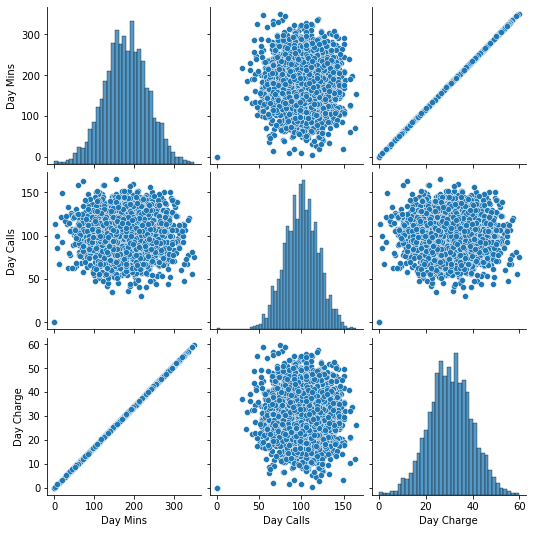

In [9]:
sns.pairplot(df[['Day Mins', 'Day Calls', 'Day Charge']])
plt.show()

Qua biểu đồ trên ta thấy được các mối quan hệ giữa 3 biến trên. Đầu tiên ta thấy được rằng không có mỗi quan hệ nào giữa biến **Day Calls** với **Day Mins** và **Day Charge**. Nhưng thay vào đó thấy được mối tương quan tuyến tính giữa 2 biến **Day Mins** với **Day Charge** khá rõ ràng nên chúng ta sẽ loại bỏ biến (tùy ý) **Day Charge**. Tương tự với các trường hợp còn lại ta cũng sẽ loại bỏ các cột **Eve Charge, Night Charge, Intl Charge**

In [10]:
df = df.drop(columns = ['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'])
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


Trong file **churn_description.pdf** có mô tả một sự bất thường trong trường dữ liệu **Area Code**, trường này chứa 3 giá trị riêng biệt 408, 415, 510 - Đây đều là những mã vùng của bang California: 

In [11]:
df['Area Code'].value_counts()

415    1655
510     840
408     838
Name: Area Code, dtype: int64

Điều này không có gì bất thường nếu như tất cả khách hàng đều sống ở Cali. Tuy nhiên trong bảng dữ liệu lại phân bố 3 mã vùng này ở tất cả các bang khác. Do đó chúng ta cần phải cảnh giác với trường dữ liệu này nên có lẽ sẽ không đưa trường dữ liệu này vào các giai đoạn tiếp theo.

In [12]:
state = set(df['State'])
state_by_area_code = pd.DataFrame({ 'State': list(state),
                    '415': [len(df[(df['State'] == item)&(df['Area Code']==415)]) for item in state], 
                      '510': [len(df[(df['State'] == item)&(df['Area Code']==510)]) for item in state], 
                      '408': [len(df[(df['State'] == item)&(df['Area Code']==408)]) for item in state]})
df = df.drop(columns=['Area Code'])
state_by_area_code.head(10)

,State,415,510,408
0,VA,35,17,25
1,FL,31,20,12
2,IA,20,16,8
3,VT,36,20,17
4,TX,37,15,20
5,ME,25,22,15
6,ID,41,20,12
7,NH,19,12,25
8,MI,39,22,12
9,MT,34,17,17


Ta có thể bỏ luôn các cột Categorical định danh của khách hàng như **Phone**, **State** để có thể tập trung vào việc khai thác mẫu phổ biến và luật kết hợp.

In [13]:
df = df.drop(columns=['State', 'Phone'])

Cuối cùng ta sẽ số hóa các cột categorical để có thể dễ làm việc hơn

In [14]:
Inter_plan = [1 if item == 'yes' else 0 for item in df["Int'l Plan"]]
Vmail_plan = [1 if item == 'yes' else 0 for item in df["VMail Plan"]]
Churn = [1 if item == 'True.' else 0 for item in df["Churn?"]]

df["Int'l Plan"] = Inter_plan
df["VMail Plan"] = Vmail_plan
df["Churn?"] = Churn
df

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0
3329,68,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
3330,28,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0
3331,184,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0


Cuối cùng ta sẽ quy định các cột numeric thành các dạng Binominal để có thể để đưa về transaction table theo dạng **Binarization**. Trong đó ta gom ta sẽ encode các cột **Calls** theo cột **Mins** bằng cách nếu cột **Min** có giá trị khác 0 thì cột **Calls** sẽ có giá trị là 1 tương ứng với việc có sử dụng dịch vụ gọi đó. Tương tự như với các Service còn lại.

In [15]:
df['Day Calls'] = [0 if item == 0.0 else 1 for item in df['Day Mins']]
df['Eve Calls'] = [0 if item == 0.0 else 1 for item in df['Day Mins']]
df['Night Calls'] = [0 if item == 0.0 else 1 for item in df['Night Mins']]
df['Intl Calls'] = [0 if item == 0.0 else 1 for item in df['Intl Mins']]
df['CustServ Calls'] = [0 if item == 0.0 else 1 for item in df['CustServ Calls']]
df['VMail Message'] = [0 if item == 0.0 else 1 for item in df['VMail Message']]
df = df.drop(columns=['Account Length', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins'])
df

,Int'l Plan,VMail Plan,VMail Message,Day Calls,Eve Calls,Night Calls,Intl Calls,CustServ Calls,Churn?
0,0,1,1,1,1,1,1,1,0
1,0,1,1,1,1,1,1,1,0
2,0,0,0,1,1,1,1,0,0
3,1,0,0,1,1,1,1,1,0
4,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
3328,0,1,1,1,1,1,1,1,0
3329,0,0,0,1,1,1,1,1,0
3330,0,0,0,1,1,1,1,1,0
3331,1,0,0,1,1,1,1,1,0


In [16]:
df.agg(sum)

Int'l Plan         323
VMail Plan         922
VMail Message      922
Day Calls         3331
Eve Calls         3331
Night Calls       3333
Intl Calls        3315
CustServ Calls    2636
Churn?             483
dtype: int64

Có vẻ như khi đưa về dạng **Binarization**, ta thấy được thêm mối quan hệ giữa 2 cột **Vmail Plan** và **Vmail Message** đó là chỉ có những người có đăng ký **VMail Plan** thì mới có thể sử dụng **Vmail Message** nên ta sẽ loại bỏ đi một trong 2 cột này.

In [17]:
df[df['VMail Plan'] != df['VMail Message']]

,Int'l Plan,VMail Plan,VMail Message,Day Calls,Eve Calls,Night Calls,Intl Calls,CustServ Calls,Churn?


In [18]:
df = df.drop(columns=['VMail Message'])
df

,Int'l Plan,VMail Plan,Day Calls,Eve Calls,Night Calls,Intl Calls,CustServ Calls,Churn?
0,0,1,1,1,1,1,1,0
1,0,1,1,1,1,1,1,0
2,0,0,1,1,1,1,0,0
3,1,0,1,1,1,1,1,0
4,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
3328,0,1,1,1,1,1,1,0
3329,0,0,1,1,1,1,1,0
3330,0,0,1,1,1,1,1,0
3331,1,0,1,1,1,1,1,0


---

# Khai thác tập phổ biến và luật kết hợp

In [ ]:
from apriori import*

In [20]:
F = Apriori(df, 0.09)

In [21]:
for f in F:
    for item in f:
        print(item)

(['Churn?'], sup = 0.14491449144914492)
(['CustServ Calls'], sup = 0.7908790879087909)
(['Day Calls'], sup = 0.9993999399939995)
(['Eve Calls'], sup = 0.9993999399939995)
(["Int'l Plan"], sup = 0.0969096909690969)
(['Intl Calls'], sup = 0.9945994599459946)
(['Night Calls'], sup = 1.0)
(['VMail Plan'], sup = 0.27662766276627665)
(['Churn?', 'CustServ Calls'], sup = 0.11731173117311768)
(['Churn?', 'Day Calls'], sup = 0.14461446144614507)
(['Churn?', 'Eve Calls'], sup = 0.14461446144614507)
(['Churn?', 'Intl Calls'], sup = 0.14491449144914537)
(['Churn?', 'Night Calls'], sup = 0.14491449144914537)
(['CustServ Calls', 'Day Calls'], sup = 0.7902790279027432)
(['CustServ Calls', 'Eve Calls'], sup = 0.7902790279027432)
(['CustServ Calls', 'Intl Calls'], sup = 0.7863786378637396)
(['CustServ Calls', 'Night Calls'], sup = 0.7908790879087437)
(['CustServ Calls', 'VMail Plan'], sup = 0.21872187218721945)
(['Day Calls', 'Eve Calls'], sup = 0.9993999399939337)
(['Day Calls', "Int'l Plan"], sup = 0

In [22]:
genRules(F,df,0.8)

['Churn?'] ---> ['CustServ Calls'], conf = 0.81, lift = 1.024, sup = 0.11731173117311768
['Churn?'] ---> ['Intl Calls'], conf = 1.0, lift = 1.005, sup = 0.14491449144914537
['Day Calls'] ---> ['Eve Calls'], conf = 1.0, lift = 1.001, sup = 0.9993999399939337
['Eve Calls'] ---> ['Day Calls'], conf = 1.0, lift = 1.001, sup = 0.9993999399939337
["Int'l Plan"] ---> ['Day Calls'], conf = 1.0, lift = 1.001, sup = 0.0969096909690972
['VMail Plan'] ---> ['Day Calls'], conf = 1.0, lift = 1.001, sup = 0.2766276627662751
["Int'l Plan"] ---> ['Eve Calls'], conf = 1.0, lift = 1.001, sup = 0.0969096909690972
['VMail Plan'] ---> ['Eve Calls'], conf = 1.0, lift = 1.001, sup = 0.2766276627662751
["Int'l Plan"] ---> ['Intl Calls'], conf = 1.0, lift = 1.005, sup = 0.0969096909690972
['VMail Plan'] ---> ['Intl Calls'], conf = 0.996, lift = 1.001, sup = 0.275427542754274
['Churn?', 'Day Calls'] ---> ['CustServ Calls'], conf = 0.809, lift = 1.023, sup = 0.11701170117011737
['Churn?', 'Eve Calls'] ---> ['Cust